In [27]:
import pulp as p 
import time

start = time.time() 
# Create a LP Minimization problem 
Lp_prob = p.LpProblem('Problem', p.LpMinimize)  
  
# Create problem Variables  
x1 = p.LpVariable("x1", lowBound = 0)   # Create a variable x >= 0 
x2 = p.LpVariable("x2", lowBound = 0)   # Create a variable y >= 0 
  
# Objective Function 
Lp_prob += 18 * x1 + 13 * x2    
  
# Constraints: 
Lp_prob += 12 * x1 + 25 * x2 >= 300
Lp_prob += 24 * x1 + 13 * x2 >= 850
  
# Display the problem 
print(Lp_prob) 
  
status = Lp_prob.solve()   # Solver 
print(p.LpStatus[status])   # The solution status 
  
# Printing the final solution 
print("x1 = ",p.value(x1),", x2 = ", p.value(x2),", L = ", p.value(Lp_prob.objective)) 
stop = time.time()
res2 =[p.value(x1),p.value(x2), p.value(Lp_prob.objective)]
print("Time: ",stop-start)
print(res2)

Problem:
MINIMIZE
18*x1 + 13*x2 + 0
SUBJECT TO
_C1: 12 x1 + 25 x2 >= 300

_C2: 24 x1 + 13 x2 >= 850

VARIABLES
x1 Continuous
x2 Continuous

Optimal
x1 =  35.4167 , x2 =  0.0 , L =  637.5006
Time:  0.021942853927612305
[35.4167, 0.0, 637.5006]


In [39]:
from scipy.optimize import linprog
import numpy as np
import time

start = time.time()
c = [18, 13]
a = [[-12, -25], [-24, -13]]
b = [-300, -850]
x1_bounds = (0, None)
x2_bounds = (0, None)
res = linprog(c, A_ub = a, b_ub = b, bounds = [x1_bounds, x2_bounds], method = "revised simplex")
print(res)
stop = time.time()
print("Time: ",stop-start)
res1= res.x.round(4)
l_value= res.fun.round(4)
res1 = np.append(res1,l_value)

     con: array([], dtype=float64)
     fun: 637.5
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([125.,   0.])
  status: 0
 success: True
       x: array([35.41666667,  0.        ])
Time:  0.002993345260620117


In [42]:
import numpy as  np
print("Allclose check: ")
print(np.allclose(np.array(res1),np.array(res2)))


Allclose check: 
True


''

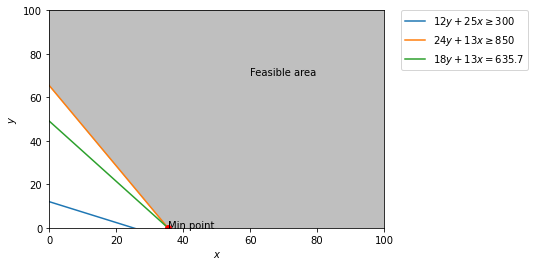

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-20,200,5000)
y1 = (300 - 12*x)/25.0
y2 = (850 - 24*x)/13.0
L = (637.5-18*x)/13.0
 
plt.plot(x, y1, label = r'$12y+25x\geq300$')
plt.plot(x, y2, label = r'$24y+13x\geq850$')
plt.plot(x, L, label = r'$18y+13x = 635.7$')
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot(35.4167, 0,'ro') 
plt.annotate("Min point", (35.4167, 0))
plt.annotate("Feasible area", (60,70))
plt.fill_between(x,y2,100, color='grey', alpha=0.5)
;

In [43]:
import numpy as np
from scipy.optimize import linprog
import time

start = time.time()
coefs = [10, 8, 7, 12, 9, 4, 6, 5, 3, 14, 15, 10, 6, 5, 7, 11, 3, 6, 4, 5]
zero_matrx = np.zeros(180, dtype=int)
zeros = zero_matrx.reshape(9, 20)
zeros[0, 0:5] = 1
zeros[1, 5:10] = 1
zeros[2, 10:15] = 1
zeros[3, 15:20] = 1
zeros[4, 0::5] = 1
zeros[5, 1::5] = 1
zeros[6, 2::5] = 1
zeros[7, 3::5] = 1
zeros[8, 4::5] = 1
print(zeros)
A = zeros
b = [85, 110, 65, 80, 90, 70, 70, 60, 50]
boundaries = [(0, int(1000))]*20
res = linprog(coefs,A_eq=A, b_eq=b, bounds=boundaries)
print(res.x.reshape(4,5).round())
print(res)
stop = time.time()

[[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]]
[[ 0.  0. 70.  0. 15.]
 [90.  0.  0. 20.  0.]
 [ 0.  0.  0. 40. 25.]
 [ 0. 70.  0.  0. 10.]]
     con: array([6.82062762e-09, 8.95191477e-09, 5.11542453e-09, 6.39418829e-09,
       7.33210470e-09, 5.62694424e-09, 5.62691582e-09, 4.77437823e-09,
       3.92182642e-09])
     fun: 1680.00000025076
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([4.91846833e-09, 1.24569314e-08, 7.00000000e+01, 7.24157086e-09,
       1.50000000e+01, 9.00000000e+01, 1.72792899e-09, 1.27044763e-08,
       2.00000000e+01, 7.46464714e-09, 5

<ipython-input-43-686b2c414ca7>:22: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(coefs,A_eq=A, b_eq=b, bounds=boundaries)
